<a href="https://colab.research.google.com/github/astropsyche29/Digit-Detection/blob/master/ML_Webinar_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras

In [ ]:
from keras.datasets import mnist

In [ ]:
data = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
len(data)

2

In [ ]:
(train_images, train_labels), (test_images, test_labels) = data

In [ ]:
len(train_images)

60000

In [ ]:
len(train_labels)

60000

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))

In [ ]:
train_images = train_images.astype('float')/255

In [ ]:
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
test_images = test_images.astype('float')/255

In [ ]:
train_labels[1]

0

In [ ]:
from keras.preprocessing import image

In [ ]:
import matplotlib.pyplot as plt

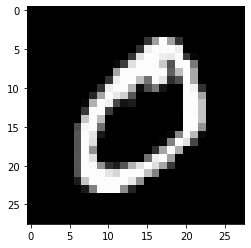

In [ ]:
plt.imshow(image.array_to_img(train_images[1]), cmap="gray")

In [ ]:
#0 -> [1, 0, 0, 0, 0, 0 , 0 , 0]
#1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_labels_original = train_labels
train_labels = to_categorical(train_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
test_labels_original = test_labels
test_labels = to_categorical(test_labels)

In [ ]:
from keras import layers, models

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.MaxPooling2D((2,2)))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
__________________________________________________

In [ ]:
model.add(layers.Dense(64, activation='relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [ ]:
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=100, batch_size=64)

Epoch 1/100
60000/60000 [==============================] - 4s 66us/step - loss: 9.4749e-04 - accuracy: 0.9998
Epoch 2/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.0013 - accuracy: 0.9998
Epoch 3/100
60000/60000 [==============================] - 4s 63us/step - loss: 6.1893e-04 - accuracy: 0.9999
Epoch 4/100
60000/60000 [==============================] - 4s 64us/step - loss: 9.8501e-04 - accuracy: 0.9998
Epoch 5/100
60000/60000 [==============================] - 4s 61us/step - loss: 4.8625e-04 - accuracy: 1.0000
Epoch 6/100
60000/60000 [==============================] - 4s 64us/step - loss: 2.2999e-04 - accuracy: 1.0000
Epoch 7/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.0011 - accuracy: 0.9999
Epoch 8/100
60000/60000 [==============================] - 4s 65us/step - loss: 8.6940e-04 - accuracy: 0.9999
Epoch 9/100
60000/60000 [==============================] - 4s 64us/step - loss: 9.7522e-04 - accuracy: 0.9999
Epoch 10/100
60000

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 74us/step


In [ ]:
test_loss

0.24174524468518585

In [ ]:
test_accuracy

0.9932000041007996

In [ ]:
predictions = model.predict(test_images)
#import numpy as np
#predicted_classes = np.argmax(predictions, axis = 1)

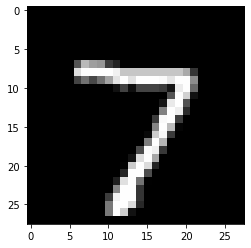

In [ ]:
plt.imshow(image.array_to_img(test_images[0]), cmap="gray")

In [ ]:
test_labels_original[0]

7

In [ ]:
predictions[0]

array([5.4189717e-17, 2.1640814e-14, 2.0068752e-15, 9.6721069e-13,
       2.4714844e-16, 4.0625649e-13, 1.5338925e-19, 1.0000000e+00,
       1.7989025e-16, 1.3227971e-12], dtype=float32)

In [ ]:
predicted_classes[0]

7

In [ ]:
test_images[0].shape

(28, 28, 1)

In [ ]:
test_images.shape

(10000, 28, 28, 1)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1

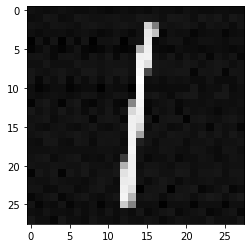

In [ ]:
img = image.load_img(path="/content/IMG_DCD1FF44BD32-1.jpeg",grayscale=True,target_size=(28,28,1))

img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1,28,28,1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]
prediction

In [ ]:
prediction

4

In [ ]:
model.save('mnist.h5')